Decision Trees¶

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO

import pandas as pd
import plotly.express as px
from pydotplus import graph_from_dot_data
from IPython.display import Image

from sklearn.preprocessing import LabelEncoder

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


NumPy will show floating point (real) in the scientific notation.. let's turn it off

In [2]:
np.set_printoptions(suppress=True)

Loading and examining the data

In [3]:
df = pd.read_csv('/Users/ashis/OneDrive/Desktop/titanicmod.csv')

In [4]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  45.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

Cool. Everything seems fine. One of the other tools for checking our data is visualizing the data. However, our data has more than 3 features, so we cannot directly visualize it (We can directly see only up to 3D). One good way to check for statistical shape of the data is to use a matrix of scatter plots. We can get a feel for the distribution of our data using that.

We are using data visualization tools from the plotly package. We are going to ask plotly to show us a scatter matrix. However, we care only to see the dimensions of the data that are features and the label part should be used to show different classes in different colours. Also, the plotly will try to fit the entire scatter matrix to the width of our screen and with data with high number features, we don't want that because it may give small pairwise scatter plots, so let's specify a size of 256 pixels for the size of each scatter plot. We ask plotly to create a figure for us and show it:


In [49]:
data_dimensions = df.columns[:-1].tolist()
figure_size = df.shape[1] * 256

fig = px.scatter_matrix(df, dimensions = data_dimensions, color = 'Survived', width = figure_size, height = figure_size)
fig.show()

Now that everything seems good, let's get our data as NumPy arrays that will be used by scikit-learn algorithms. Our data X will be a matrix which has different datapoints in different rows and different features in different columns and since the 'Survived' column of the dataframe df is not a feature of the data (but rather the label), let's exclude that. Then, our labels (or targets) y will be a vector consisting of simply that 'Label' column of data frame df.

In [5]:
df.drop(['PassengerId','Name','Embarked','Cabin','Ticket','Parch','SibSp'], axis = 'columns',inplace=True)

In [6]:
df.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [7]:
X = df.drop('Survived',axis='columns')
y = df.Survived

In [8]:
le_Pclass = LabelEncoder()
X['Sex'] = le_Pclass.fit_transform(X['Sex'])

In [9]:
X.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    27.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
X.Age = X.Age.fillna(X.Age.mean())

In [11]:
X.head()

Pclass  Sex   Age     Fare
0       3    1  22.0   7.2500
1       1    0  38.0  71.2833
2       3    0  26.0   7.9250
3       1    0  35.0  53.1000
4       3    1  35.0   8.0500

Let's see if everything is fine. Let's see our data X:

In [12]:
X

Pclass  Sex   Age     Fare
0         3    1  22.0   7.2500
1         1    0  38.0  71.2833
2         3    0  26.0   7.9250
3         1    0  35.0  53.1000
4         3    1  35.0   8.0500
..      ...  ...   ...      ...
886       2    1  27.0  13.0000
887       1    0  19.0  30.0000
888       3    0  45.0  23.4500
889       1    1  26.0  30.0000
890       3    1  32.0   7.7500

[891 rows x 4 columns]

Good. Now let's check the shape of X. We should have 1870 rows since we have 1870 datapoints and we should have 7 columns since there are 7 fetaures on our data:

In [13]:
X.shape

(891, 4)

Let's do the same check with the targets vector y:

In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

...and the shape of y should be the same number of rows and singular in column (so there is only a row dimension and no column dimension):

In [15]:
y.shape

(891,)

Perfect

## Splitting the data

Now, remeber we emphasized the importance of splitting your data into train, validation and held-out test sets? Let's put that into use. We will talk about this splitting later on in this course and you don't need to understand how this function works, however, we will provide a short explanation for those of you who are interested.

Unfortunately, scikit-learn does not have a function to divide the data into three parts, only a function that splits the data into two. So, we are goign to call that function twice, once to split data into two sets: a. training; and b. validation and test combined. Then, we call the function once more to split that second set into distinct validation and test sets. We chose to reserve 0.4 (or 40%) of our data for validation and test and 1 - 0.4 = 0.6 or 60% of our data for training. From the 40% left for validation and test, we are going to use 0.5 or 50% of it (which make sit 20% of the total amount of data) for validation and the other 50% for test.

In [16]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.4, random_state = 0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

# Building and fitting a decision tree

Finally, it's time to build your decision tree. Remember, we create an object of the class DecisionTreeClassifier first. Let's set the name dtree for that object. In Python, you create an object of class Clss with its parameter par set to value val and assign it a name of obj by saying:

obj = Clss(par=val)

You can see the documentation for DecisionTreeClassifier here:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

So, go ahead and create that decision tree now (also remember we are not specifying any parametes for our decision tree this time):


In [43]:
### begin your code here (1 line).
model = DecisionTreeClassifier()

### end your code here.

Next step is to train our decision tree model. Again, remember we use the function (or method) fit of our decision tree object to do that. In Python, you call a method mthd_a of an object obj, which takes arguments arg_a1 and arg_a2 by saying:

obj.mthd_a(arg_a1, arg_a2)

You can see the documentation for fit method here:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit

Now, go ahead and fit your dtree to the training data and don't forget to pass the X_train training data and y_train training targets required for fitting:


In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

If everything went on fine, you should be seeing a summary of the model you trained:

    DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')



# Visualizing the decision tree


Now, let's visualize our decision tree. Let's export our model as a special kind of data, create a visual representation form that, generate a graph from that representation and show that graph as an image (it may be a big image, so you may have to scroll to see the whole thing):


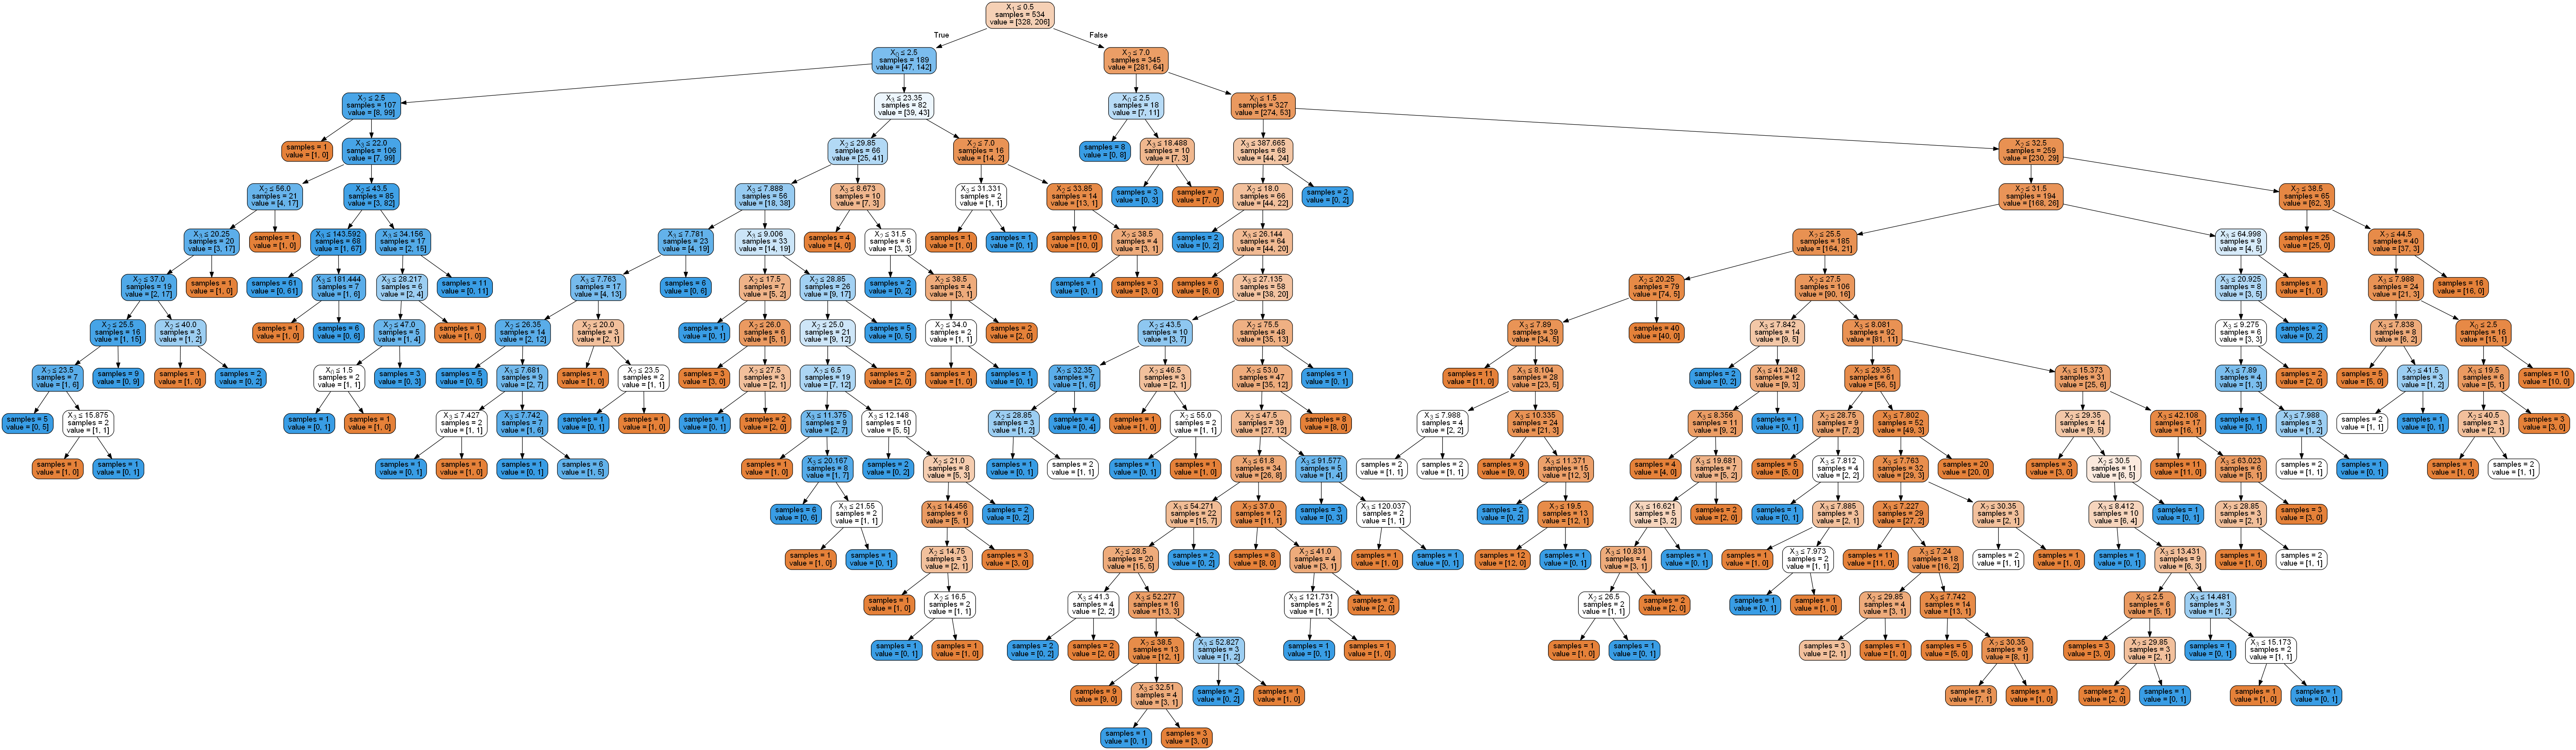

In [22]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, impurity=False, special_characters=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), unconfined=True)

# Model assessment and selection

So let's evaluate our QuAM. First, let's see what happened on training data. You are going to put in the code that asks our decision tree dtree to predict the label for training data X_train and assign it to a vector variable yhat_train. Remember that the predict is the name of the method that asks a model object to predict labels. Again, you call a method mthd_b of an object obj that takes argument arg_b1 and assign it to a variable var by doing:

var = obj.mthd_b(arg_b1)

You can see the documentation for predict method here:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict

So predict the labels of the training data and assign it to yhat_train

In [35]:
### begin your code here (1 line).
y_pred = model.predict(X_test)
### end your code here.

In [37]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

Now we can assess the accuracy of our classification model between the yhat_train you computed and the actual alebls that came with the training data, y_train:

In [39]:
score =  accuracy_score(y_test, y_pred)*100
print('Accuracy using Decision Tree :', round(score,2),'%')

Accuracy using Decision Tree : 78.21 %


A perfect 1.0 or 100%! However, that was what was expected given the minimum leaf size was 1, we let the decision tree split leafs with even 2 points in them and we had no tree depth limittation among other things.

Let's use our validation data then. Calculate yhat_validation by asking dtree to predict labels for X_validation. Then, we can calculate the score for validation data

In [40]:
### begin your code here (1 line).
y_pred = model.predict(X_validation)
### end your code here.
accuracy_score(y_pred, y_validation)

0.6853932584269663

Right. The accuracy on validation data is much lower (should be ~0.???? or ??.??%). Maybe we have overfit to our data. Unrestricted decision trees do that.

Let's create a new decision tree object dtree2, but this time let's set a minimum number of samples per leaf. Let's do 15. Go ahead and create dtree2, however, this time specify that you want the min_samples_leaf to be set to 15. Then, just fit your model to the training data and targets, X_train and y_train:


In [44]:
### begin your code here (2 lines).
model_super = DecisionTreeClassifier(min_samples_leaf = 15)
model_super.fit(X_train,y_train)
### end your code here.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

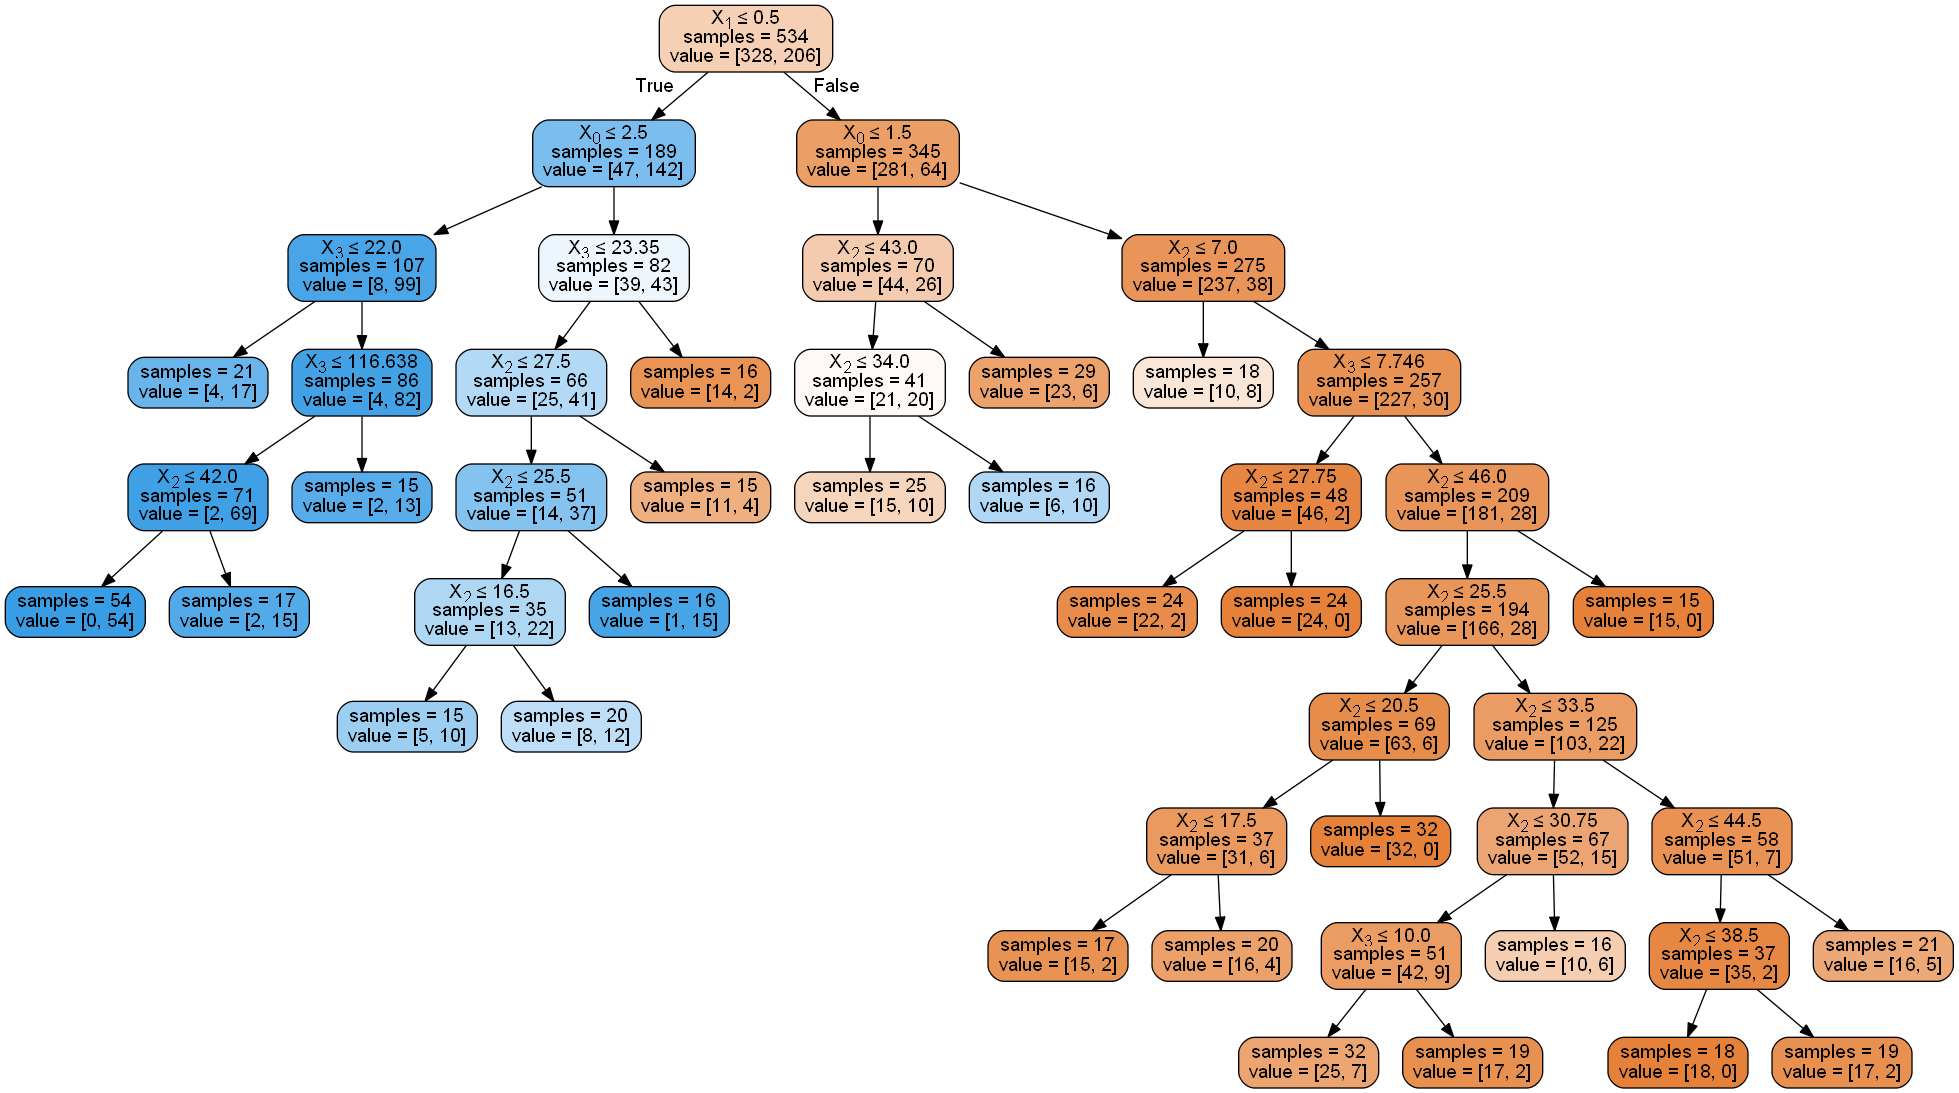

In [48]:
dot_data = StringIO()
export_graphviz(model_super, out_file=dot_data, filled=True, rounded=True, impurity=False, special_characters=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), unconfined=True)

Again, you should be getting a summary of your model parameters if everything went right. In the summary you should be seeing that min_samples_leaf=15:

    DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=15, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')

Now, predict yhat_train2, so we can the accuracy on training data:


In [45]:
### begin your code here (1 line).
y_pred2 = model_super.predict(X_train)
### end your code here.
accuracy_score(y_pred2, y_train)

0.8352059925093633

Training accuracy is predictably lower (~0.???? or ??.??%) as we restrcited our decision tree, so it does not fit perfectly to training data because of its constraints.

Let's predict yhat_validation2 and we can the accuracy on validation data:


In [46]:
### begin your code here (1 line).
y_pred2 = model_super.predict(X_validation)
### end your code here.
accuracy_score(y_pred2, y_validation)

0.7696629213483146

 ## Evaluating the decision tree

Finally, let's use the test data to get a final accuracy performance number for our model. Predict yhat_test2 using dtree2. We can then calculate the accuracy on test data:

In [47]:
### begin your code here (1 line).
y_pred2 = model_super.predict(X_test)
### end your code here.
accuracy_score(y_pred2, y_test)

0.8212290502793296

Voila! The accuracy on test data (~0.???? or ??.??%), on validation data and on training data are close to each other, which is a good sign.

Well done!
